# 2 Dimensional Histograms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import statsmodels.stats.multitest

import matplotlib.ticker as ticker

import cptac
import cptac.utils as u

/Users/Lindsey/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Step 1: Get Data Frame and Calculate Std Dev and Mean

Download data frame that has FDR corrected pvalues for all trans proteins. Next, calculate the total number of p values significant for each trans protein. Then calculate the mean and standard deviation of pvalues/ Pearson correlations across a trans gene. 

In [2]:
df_fdr_pvals = pd.read_csv("Step3.2_combining_pearson_dfs/csv_files/pancan_EGFR_all_FDR_wide_pvals.csv")
df_fdr_pvals = df_fdr_pvals.drop(['Unnamed: 0'], axis=1)
df_fdr_pvals = df_fdr_pvals.set_index("Comparison")


In [3]:

def Pvalue_sig(row):
    numSig = 0

    for item in row:
        if pd.isnull(item):
            continue
        if item < 0.05:
            numSig += 1
            
    return numSig

In [4]:
#df_fdr_pvals = df_fdr_pvals.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon","P_value_Lscc"]]
df_fdr_pvals = df_fdr_pvals[1:] #Drop EGFR 

In [5]:
df_fdr_pvals["Num_sig"] = df_fdr_pvals.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon","P_value_Lscc"]].apply(Pvalue_sig, axis = 1)
df_fdr_pvals = df_fdr_pvals.sort_values(by=['Num_sig'],ascending=False)


In [6]:
#Keep trans genes that are significant in atleast 1 gene. 
df_fdr_pvals = df_fdr_pvals[df_fdr_pvals['Num_sig'].isin([1,2,3,4,5,6])]

In [7]:
#Calculate mean and standard deviation for pvalues and Pearson Correlations
df_fdr_pvals["Standard_Deviation_P_value"] = df_fdr_pvals.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon","P_value_Lscc"]].std(axis = 1)
df_fdr_pvals["Mean_P_value"] = df_fdr_pvals.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon","P_value_Lscc"]].mean(axis = 1)
df_fdr_pvals["Standard_Deviation_Correlation"] = (df_fdr_pvals.loc[:,["Correlation_Gbm","Correlation_kidney","Correlation_Ovar","Correlation_Brca","Correlation_Luad","Correlation_hnscc","Correlation_colon","Correlation_Lscc"]].std(axis = 1))
df_fdr_pvals["Mean_Correlation"] = (df_fdr_pvals.loc[:,["Correlation_Gbm","Correlation_kidney","Correlation_Ovar","Correlation_Brca","Correlation_Luad","Correlation_hnscc","Correlation_colon","Correlation_Lscc"]].mean(axis = 1))

df_fdr_pvals

,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Ovar,P_value_Ovar,Correlation_Brca,P_value_Brca,Correlation_Luad,P_value_Luad,...,P_value_hnscc,Correlation_colon,P_value_colon,Correlation_Lscc,P_value_Lscc,Num_sig,Standard_Deviation_P_value,Mean_P_value,Standard_Deviation_Correlation,Mean_Correlation
Comparison,,,,,,,,,,,,,,,,,,,,,
LANCL2_proteomics,0.478723,0.000091,0.188217,0.193598,0.110983,0.627956,0.300981,7.599309e-03,0.588808,4.733914e-08,...,1.970503e-21,0.320786,0.026823,0.575817,2.040789e-07,6,0.220706,0.107008,0.230333,0.420130
CD109_proteomics,-0.361839,0.004379,0.268902,0.044632,0.015377,0.961793,0.265349,2.042875e-02,0.113339,4.717738e-01,...,8.765469e-06,0.297635,0.042193,0.360461,7.836561e-03,6,0.348547,0.194131,0.266765,0.184153
CNNM4_proteomics,-0.372324,0.003168,0.069926,0.718877,0.076606,0.751602,-0.260055,2.329196e-02,0.270616,4.101591e-02,...,3.293176e-02,0.352937,0.013936,0.311652,3.142153e-02,6,0.329428,0.202031,0.273997,0.091721
KIF13B_proteomics,-0.143903,0.357780,-0.310972,0.016103,0.439778,0.009101,-0.312353,5.460232e-03,-0.272975,3.960258e-02,...,2.212241e-04,0.019902,0.918920,-0.363670,6.920009e-03,6,0.326279,0.169263,0.285396,-0.173143
MYO10_proteomics,0.447478,0.000289,-0.263921,0.049045,0.374118,0.035041,0.515801,5.191477e-07,0.230896,8.949836e-02,...,2.728434e-03,NaN,NaN,0.292466,4.901629e-02,6,0.033619,0.032231,0.257917,0.281063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GALNT5_proteomics,-0.389439,0.057159,-0.170202,0.593842,0.023757,0.933275,0.162343,2.040810e-01,0.026079,8.963231e-01,...,4.623137e-01,0.297776,0.042100,0.252618,1.086917e-01,1,0.366423,0.412223,0.227399,0.040280
NCOA4_proteomics,-0.357481,0.007938,-0.057011,0.773348,-0.086256,0.774530,0.119416,3.534835e-01,0.099871,5.338038e-01,...,9.862744e-01,NaN,NaN,0.207661,2.112708e-01,1,0.349242,0.520093,0.184929,-0.009816
RPL18_proteomics,-0.202600,0.162971,0.072834,0.688536,-0.216584,0.270229,0.279736,1.384014e-02,-0.041651,8.236951e-01,...,5.179845e-02,0.087287,0.619058,0.003343,9.906637e-01,1,0.374336,0.452599,0.186379,0.030842


# Step 2: Plot 2D Histogram

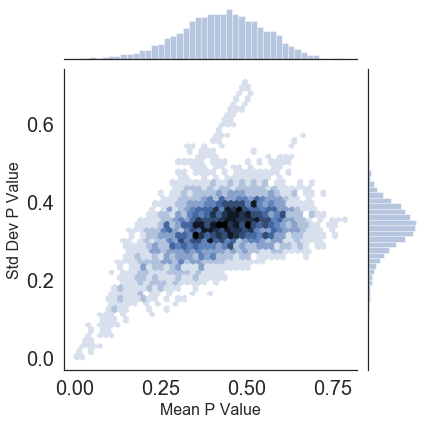

In [8]:

sns.set(rc={'xtick.labelsize':20,
            'ytick.labelsize':20}, style = "white")
g = (sns.jointplot("Mean_P_value","Standard_Deviation_P_value",data = df_fdr_pvals, kind="hex", bins = 10)
        .set_axis_labels("Mean P Value", "Std Dev P Value", fontsize=16))

plt.show()
g.savefig("Step3_beehive_Pval_EGFR.png", dpi = 300)

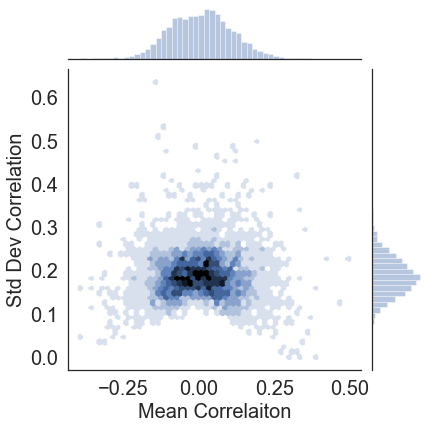

In [9]:
sns.set(rc={'xtick.labelsize':20,
            'ytick.labelsize':20}, style = "white")

g = (sns.jointplot("Mean_Correlation","Standard_Deviation_Correlation",data = df_fdr_pvals, kind="hex", bins = 10)
        .set_axis_labels("Mean Correlaiton", "Std Dev Correlation", fontsize=20))


g.savefig("Step3_beehive_Corr_EGFR.png", dpi = 300)
plt.show()